## Hand written text recognition 
   *  use principle component analysis algorith to decrease the feature size of the dataset
   *  then apply logistic regression to new ewsized dataset which now contains only principle components of digits

In [52]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#download mnist_784 dataset
#may take upto 2 minutes
mnist = fetch_openml('mnist_784')

In [53]:
mnist.data.shape

(70000, 784)

### Define a function to see the number of photos in the Minst dataset

In [54]:
#takes the data frame and index number of the dataframe as arguments
def showImage(dframe, index):
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28, 28)
    
    plt.imshow(some_digit_image, cmap="binary")
    plt.axis("off")
    plt.show()

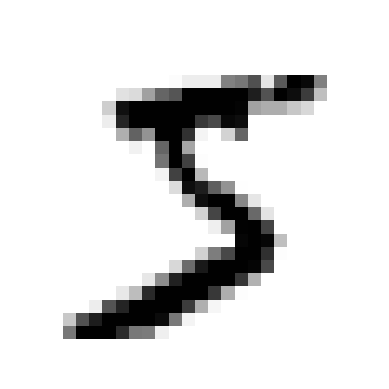

In [55]:
#sample usage
showImage(mnist.data, 0)

### split data -> Training set and Test set

In [56]:
#test and train ration is 1/7 and 6/7
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0,random_state=0)

In [57]:
type(train_img)

pandas.core.frame.DataFrame

In [58]:
#copy train_img for later use (checking results)
test_img_cpy = test_img.copy()

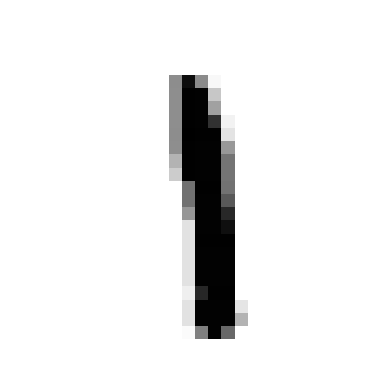

In [59]:
showImage(test_img_cpy, 2)

### Scale the data
   *  PCA can give erroneous resoults in unscaled data - use StandardScaler

In [60]:
scalar = StandardScaler()

#only need to make the scalar fir on the training set
scalar.fit(train_img)

#we need to transform both the training set and the test set
train_img = scalar.transform(train_img)
test_img = scalar.transform(test_img)

### Stage 1: Apply PCA algorithms on the dataset....
*    state that we want Variance to be protected by 95%

In [61]:
# make an instance of the pca model

pca_model = PCA(.95)


In [62]:
# We need to do PCA to the training set:

pca_model.fit(train_img)

PCA(n_components=0.95)

In [63]:
print(pca_model.n_components_)

327


In [64]:
train_img = pca_model.transform(train_img)
test_img = pca_model.transform(test_img)

## Stage 2: Logistic Regression

In [65]:
logisticRegr = LogisticRegression(solver= 'lbfgs', max_iter=10000)

### Traing our LogisticRegression model using our train data

In [77]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

### our model has been trained, now lets perform machine learning recognition operation on handwritten digits:

In [84]:
logisticRegr.predict(test_img[42].reshape(1, -1))

array(['9'], dtype=object)

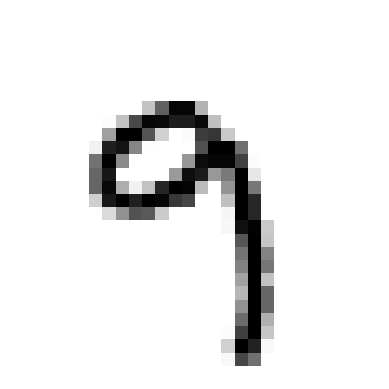

In [85]:
showImage(test_img_cpy, 42)

### Measuring the accuracy of our model

In [86]:
logisticRegr.score(test_img, test_lbl)

0.9184

### The Conclusion


In this project, we significantly shortened the training time of AI by logistic regression using PCA. I aimed to protect 95% variance. You can find out for yourself how much the time is shortened by lowering the 95% variance. The PCA algorithm, which greatly shortens the training time of artificial intelligence for 10 digits, will shorten the training time of artificial intelligence for hundreds or even thousands of different object types by hours, and this will make your programs run much faster.

With this project, we brought together 2 completely different machine learning models and accomplished a task that we can encounter in daily life by writing an artificial intelligence program on our computer!

It's a super technology when we really think about it, we can automatically recognize handwritten numbers and convert it into a digital number character that the computer can understand! If you think about it, you can come up with a wide variety of inventions and products using such technology. For example... you could develop this project a little further (including the letters in the alphabet) and create a software that automatically reads handwritten petitions and converts them to a digital Microsoft Word file or PDF file. People can automatically upload a petition that they create by taking their photo, and you can save it as text in the database. Thanks to artificial intelligence, you will have skipped many manual steps in between!
